In [1]:
! pip install ipynb # ipynb allows to import functions from other ipynb in the same folder.
from ipynb.fs.full.my_functions import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

In [2]:
#Loading decoded survey

silc = pd.read_csv(r'C:\Users\dvale\TFM\Data\ilc.csv', low_memory=False)

In [3]:
#Deleting unnecesary columns like flag columns or others

unflaged_columns = unflag(silc.columns) #Calling unflag function from my_functions.ipynb
silc = silc[unflaged_columns]

silc = silc.drop(irrelevant_columns, axis=1) #irrelevant_columns is a list of columns also imported from my_functions.ipynb

In [4]:
#Printing all columns in the survey for easy access

for c in silc.columns:
    print(c)

Personal ID
Personal cross-sectional weight
Year of birth
Sex
Basic activity status
Education at pre-school
Education at compulsory school
Childcare at centre-based services
Childcare at day-care centre
Childcare by a professional child-minder at child's home or at child-minder’s home
Childcare by grand-parents, other household members (outside parents), other relatives, friends or neighbours
Childrens’ cross-sectional weight for childcare
Living in household with low employement level
Living in household under risk of poverty
Marital status
Consensual Union
Country of birth
Citizenship
Current education activity
ISCED level currently attended
Year when highest level of education was attained
Highest ISCED level attained
Self-defined current economic status
Whether person has ever worked
Actively looking for a job
Available for work
Status in employment
Occupation
Number of hours usually worked per week in main job
Number of months spent at full-time work as employee
Number of months s

In [5]:
#Loading the id and ponderation weigth of each respondent. Ponderation is needed for accurate statistical analysis and I have
#defined special functions in order to do that. For more information see my_functions

variables = pd.DataFrame({'id': silc['Personal ID'], 'weight': silc['Personal cross-sectional weight']})
variables.head()

,id,weight
0,101,906.15830
1,102,906.15830
2,201,1227.68869
3,202,1227.68869
4,301,2559.35987


In [6]:
#Material deprivation is the dependent variable for this project.

variables['material_deprivation'] = silc['Household endures severe material deprivation']

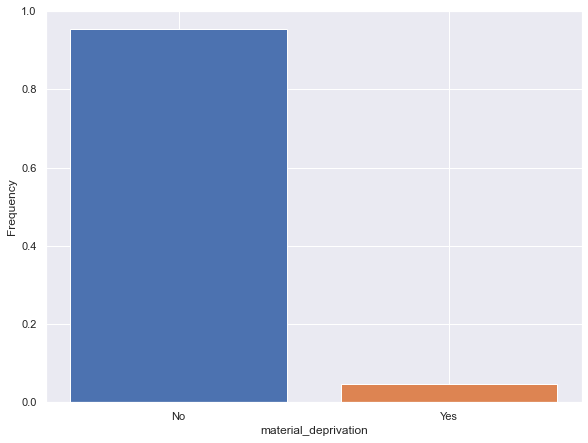

In [7]:
#barplot from my_functions takes a column name and a dataframe as arguments and plots a weigthed frecuency bar chart.

barplot(x='material_deprivation', data=variables) 

In [8]:
variables['sex'] = silc['Sex']
variables.head()

,id,weight,material_deprivation,sex
0,101,906.15830,No,Male
1,102,906.15830,No,Female
2,201,1227.68869,No,Female
3,202,1227.68869,No,Male
4,301,2559.35987,No,Female


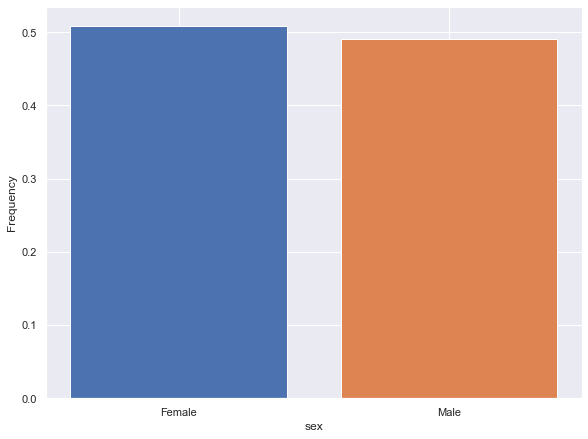

In [9]:
barplot(x='sex', data=variables) 

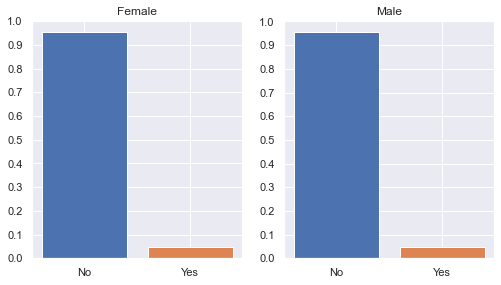

In [10]:
#bardiagram from my_functions takes two categorical variables and plots a weigthed bar chart diagram. 

bardiagram(x='sex', y='material_deprivation', data=variables)

In [11]:
variables['age'] = silc['Year of birth'].apply(lambda x: 2019-x)
variables.head()

,id,weight,material_deprivation,sex,age
0,101,906.15830,No,Male,70
1,102,906.15830,No,Female,68
2,201,1227.68869,No,Female,72
3,202,1227.68869,No,Male,60
4,301,2559.35987,No,Female,54


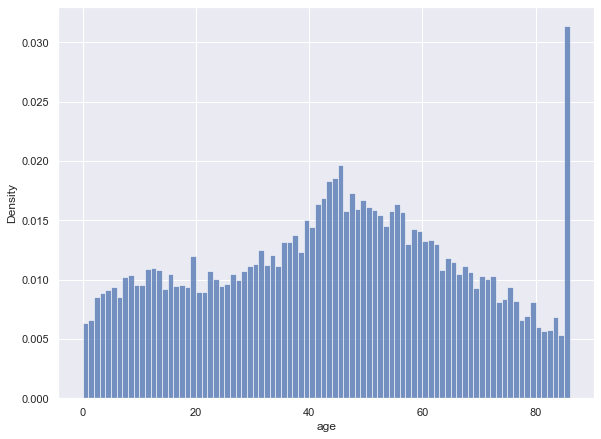

In [12]:
#The survey marks everyone born before 1932 as '1932'. Therefore all the respondants 86 year old or older have the same age
#assigned.

#histplot from my_functions takes a column name and a dataframe as arguments and plots a weigthed histogram. Bin number is also
#customizable.

histplot(x='age', data=variables, bins=max(variables.age)-min(variables.age))

In [13]:
#Minor respondans have many questions missing in the survey. Therefore this project focuses only on adult respondents.

silc = silc[silc['Year of birth'] < 2001].reset_index(drop=True)
variables = variables[variables.age > 18].reset_index(drop=True)

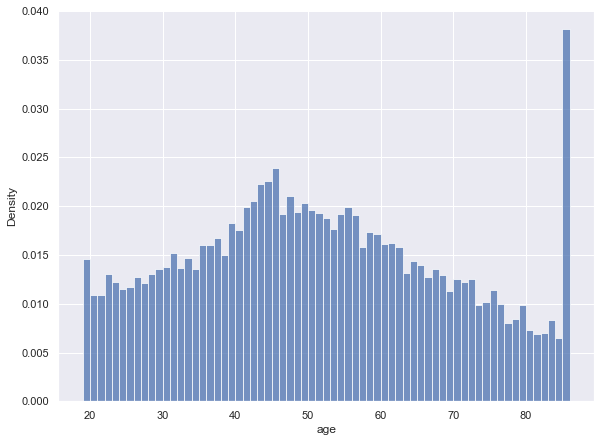

In [14]:
histplot(x='age', data=variables, bins=max(variables.age)-min(variables.age))

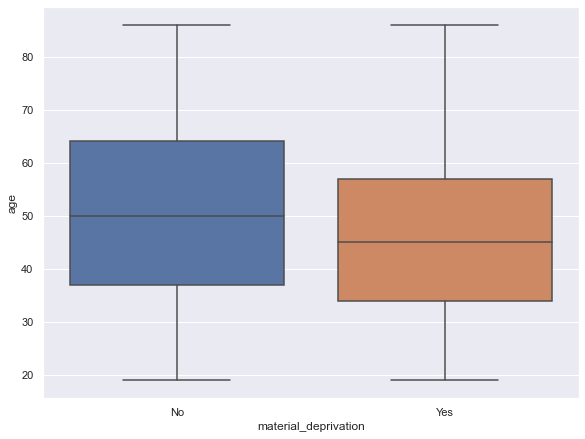

In [15]:
#boxplot from my_functions takes one categorical variable and one numerical variable and plots a weigthed boxplot.

boxplot(x='material_deprivation', y='age', data=variables)

In [16]:
variables['civil_status'] = silc['Marital status']
variables.civil_status = variables.civil_status.fillna('Missing')
variables.head()

,id,weight,material_deprivation,sex,age,civil_status
0,101,906.15830,No,Male,70,Married
1,102,906.15830,No,Female,68,Married
2,201,1227.68869,No,Female,72,Married
3,202,1227.68869,No,Male,60,Married
4,301,2559.35987,No,Female,54,Divorced


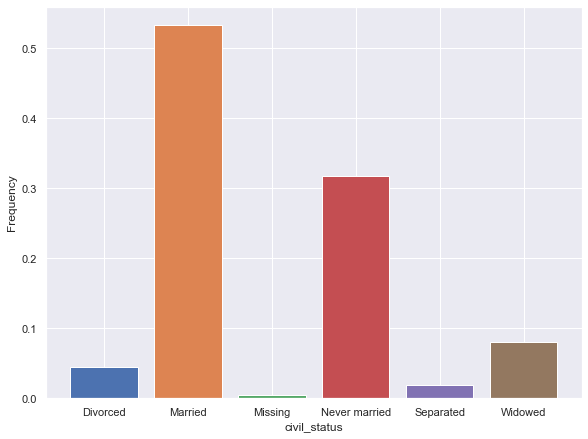

In [17]:
barplot(x='civil_status', data=variables)

In [18]:
#Many non-married individuals have in fact long time partners with whom they enjoy relationships similar to marriage but with
#out the legal status. Grouping them together allows to uncover distinct sociodemographic characteristics.

variables['consensual_union'] = silc['Consensual Union']
variables.consensual_union = variables.consensual_union.fillna('Missing')
variables.head()

,id,weight,material_deprivation,sex,age,civil_status,consensual_union
0,101,906.15830,No,Male,70,Married,"Yes, with legal basis"
1,102,906.15830,No,Female,68,Married,"Yes, with legal basis"
2,201,1227.68869,No,Female,72,Married,"Yes, with legal basis"
3,202,1227.68869,No,Male,60,Married,"Yes, with legal basis"
4,301,2559.35987,No,Female,54,Divorced,No


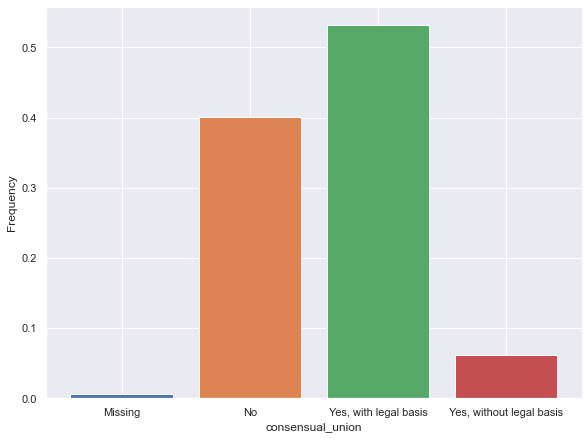

In [19]:
barplot(x='consensual_union', data=variables)

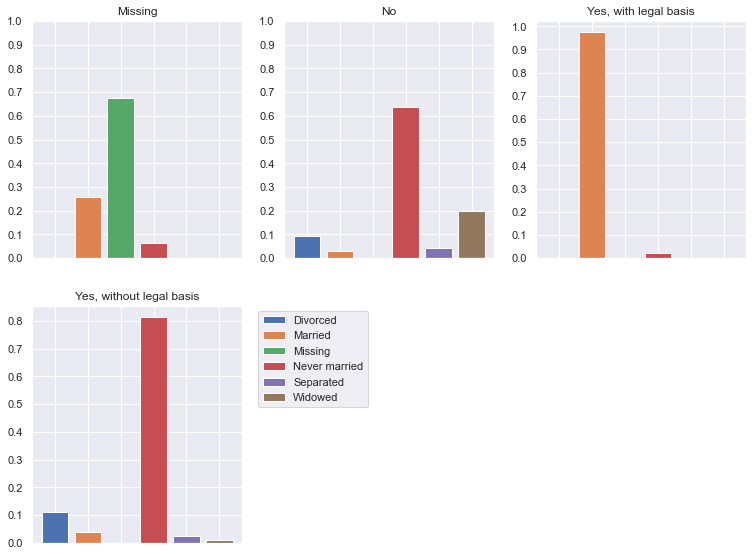

In [20]:
#The legend argument sets a legend besides the last chart. If false the legend labels will show under the bars.

bardiagram(x='consensual_union', y='civil_status', data=variables, legend=True)

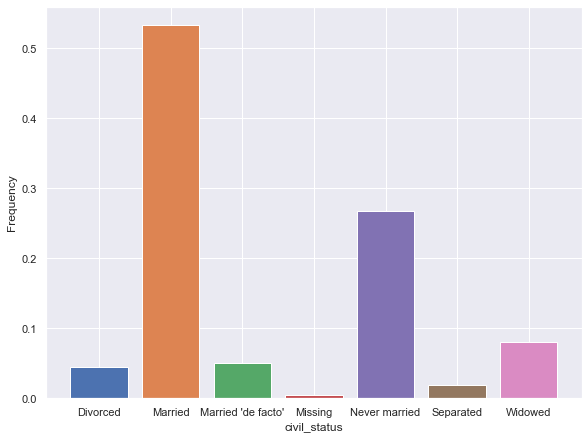

In [21]:
#Those who claim to be in a consensual union but without legal status are grouped under the label 'Married "de facto"'

variables['civil_status'] = variables.apply(lambda row: "Married 'de facto'" 
                                            if row['consensual_union'] == 'Yes, without legal basis' 
                                            and row['civil_status'] == 'Never married'
                                            else row['civil_status'],
                                            axis=1)

barplot(x='civil_status', data=variables)

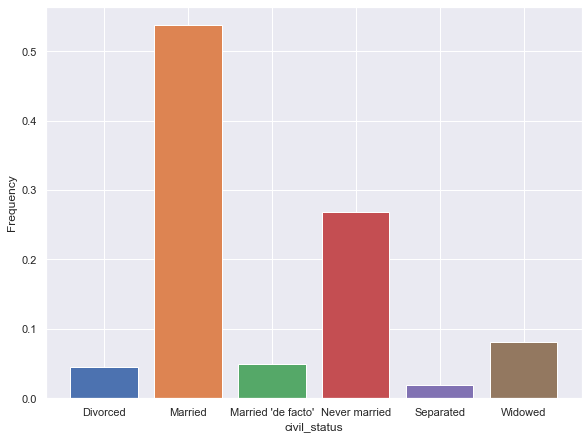

In [22]:
#Missing values are replaced by the variable mode. More acqurate but complex methods for dealing with missing values were
#disregarded given the small size of the missing sample. The same method is used throughout the notebook for similar reasons.

variables['civil_status'] = variables.apply(lambda row: variables.civil_status.mode()[0] 
                                            if row['civil_status'] == 'Missing'
                                            else row['civil_status'],
                                            axis=1)

barplot(x='civil_status', data=variables)

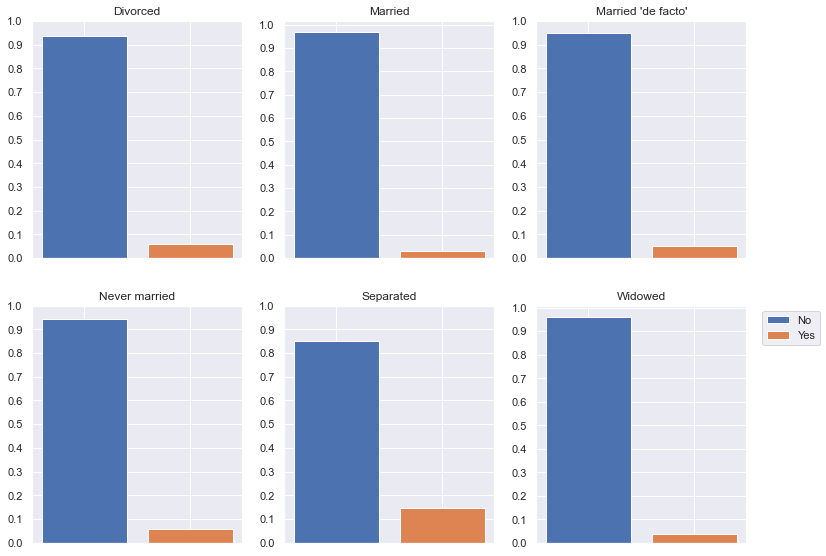

In [23]:
bardiagram(x='civil_status', y='material_deprivation', data=variables, legend=True)

In [24]:
variables = variables.drop(['consensual_union'], axis=1)

In [25]:
#People living in households with children are assigned the label 'familial status'

variables['familial_status'] = silc['Type of household']

mapped_familial_status = {'Two adults, no children, one older than 64': 'No', 
                          'Two adults with one children': 'Yes', 
                          'One adult with one or more children': 'Yes',
                          'Other household types with no children': 'No',
                          'One female, between 30 and 64': 'No', 
                          'Two adults with two children': 'Yes',
                          'Two adults, no children, both older than 64': 'No',
                          'One male, between 30 and 64': 'No',
                          'Two adults with three or more children': 'Yes',
                          'One male, older than 64': 'No',
                          'One female, older than 64': 'No', 
                          'Other household types with children': 'Yes', 
                          'One male, younger than 30': 'No', 
                          'One female, younger than 30': 'No'}

variables.familial_status = variables.familial_status.map(mapped_familial_status)

variables.familial_status = variables.familial_status.fillna('Missing')
variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status
0,101,906.15830,No,Male,70,Married,No
1,102,906.15830,No,Female,68,Married,No
2,201,1227.68869,No,Female,72,Married,No
3,202,1227.68869,No,Male,60,Married,No
4,301,2559.35987,No,Female,54,Divorced,Yes


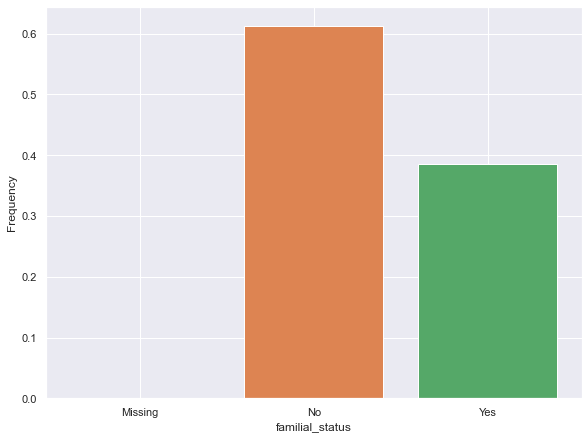

In [26]:
barplot(x='familial_status', data=variables)

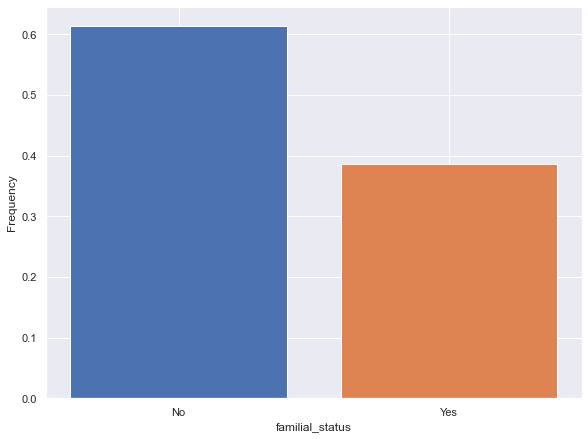

In [27]:
variables['familial_status'] = variables.apply(lambda row: variables.familial_status.mode()[0] 
                                               if row['familial_status'] == 'Missing'
                                               else row['familial_status'],
                                               axis=1)

barplot(x='familial_status', data=variables)

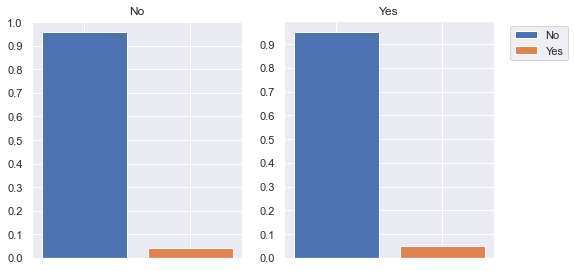

In [28]:
bardiagram(x='familial_status', y='material_deprivation', data=variables, legend=True)

In [29]:
variables['region'] = silc['Region']
variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region
0,101,906.15830,No,Male,70,Married,No,Basque Country
1,102,906.15830,No,Female,68,Married,No,Basque Country
2,201,1227.68869,No,Female,72,Married,No,Basque Country
3,202,1227.68869,No,Male,60,Married,No,Basque Country
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country


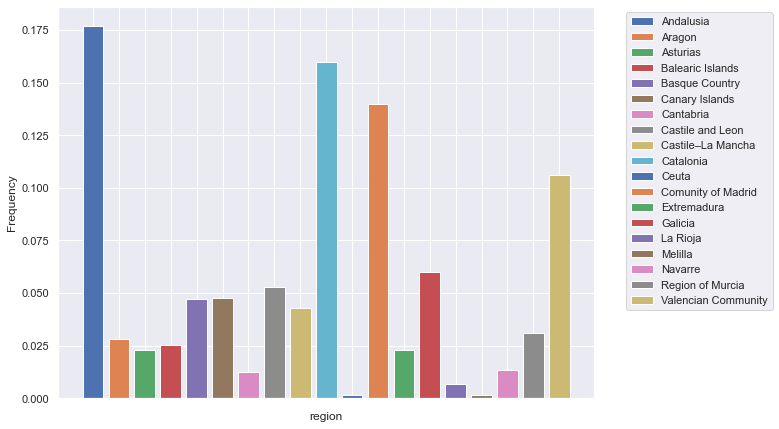

In [30]:
barplot(x='region', data=variables, legend=True)

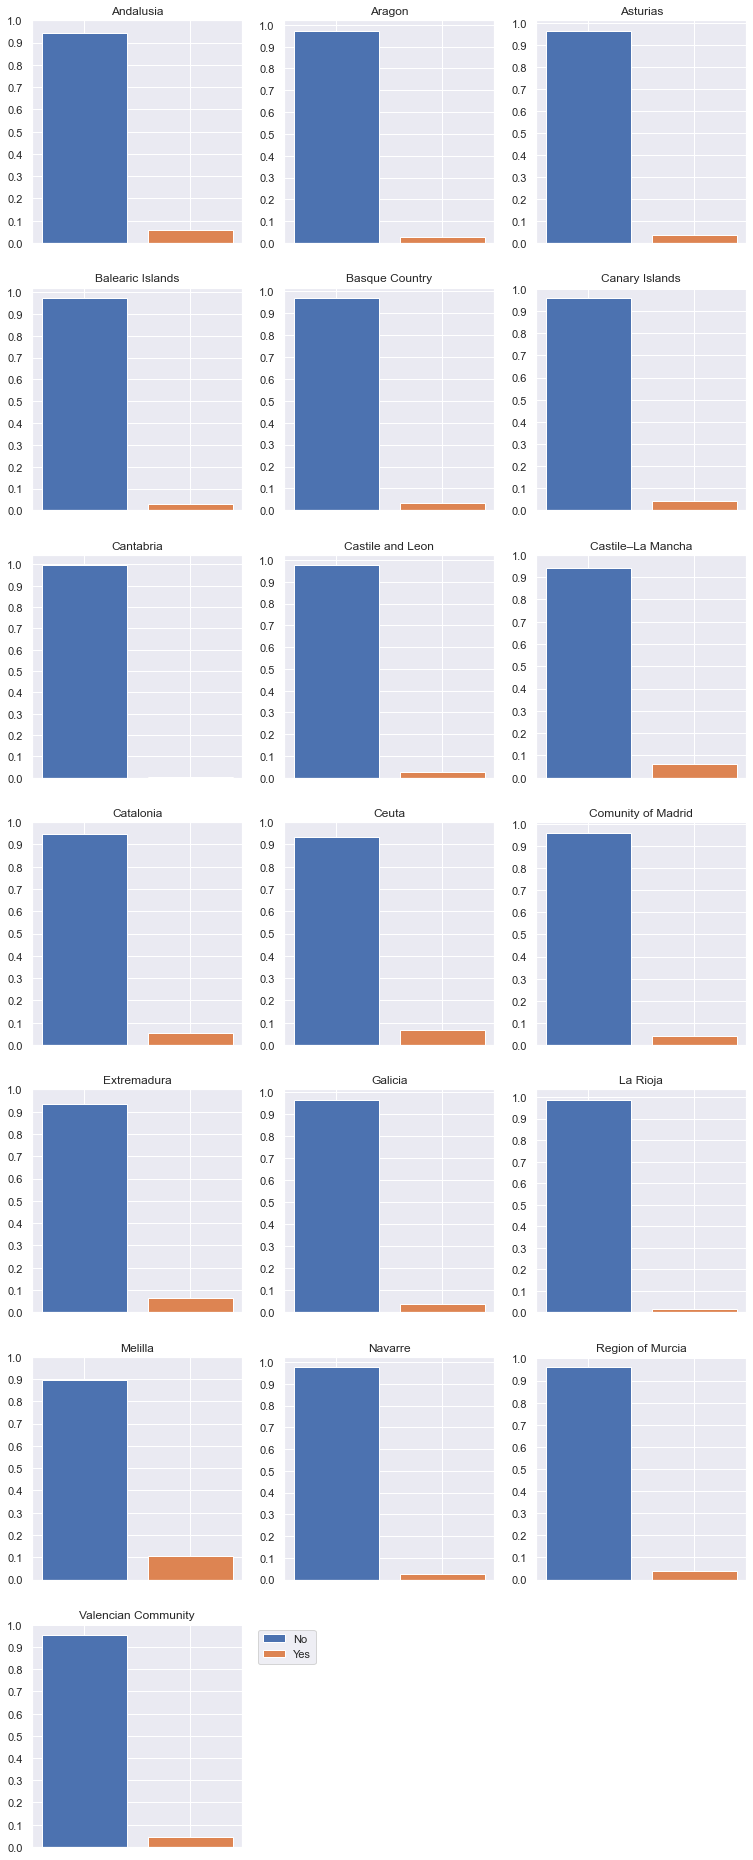

In [31]:
bardiagram(x='region', y='material_deprivation', data=variables, legend=True)

In [32]:
variables['population_density'] = silc['Degree of urbanisation']

variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region,population_density
0,101,906.15830,No,Male,70,Married,No,Basque Country,Thinly-populated area
1,102,906.15830,No,Female,68,Married,No,Basque Country,Thinly-populated area
2,201,1227.68869,No,Female,72,Married,No,Basque Country,Thinly-populated area
3,202,1227.68869,No,Male,60,Married,No,Basque Country,Thinly-populated area
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country,Thinly-populated area


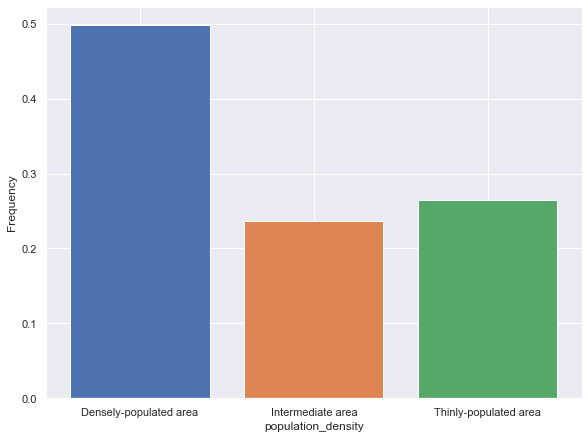

In [33]:
barplot(x='population_density', data=variables)

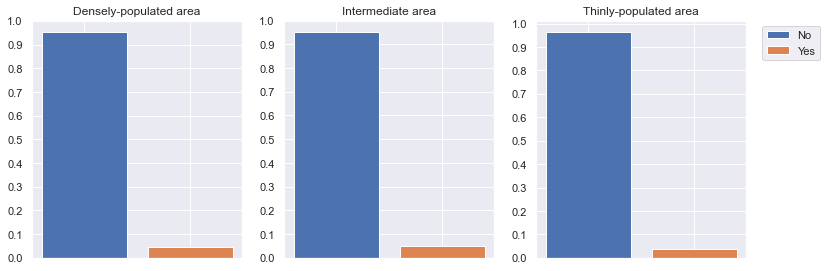

In [34]:
bardiagram(x='population_density', y='material_deprivation', data=variables, legend=True)

In [35]:
variables['citizenship'] = silc['Citizenship']

variables.citizenship = variables.citizenship.fillna('Missing')
variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship
0,101,906.15830,No,Male,70,Married,No,Basque Country,Thinly-populated area,Spain
1,102,906.15830,No,Female,68,Married,No,Basque Country,Thinly-populated area,Spain
2,201,1227.68869,No,Female,72,Married,No,Basque Country,Thinly-populated area,Spain
3,202,1227.68869,No,Male,60,Married,No,Basque Country,Thinly-populated area,Spain
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country,Thinly-populated area,Spain


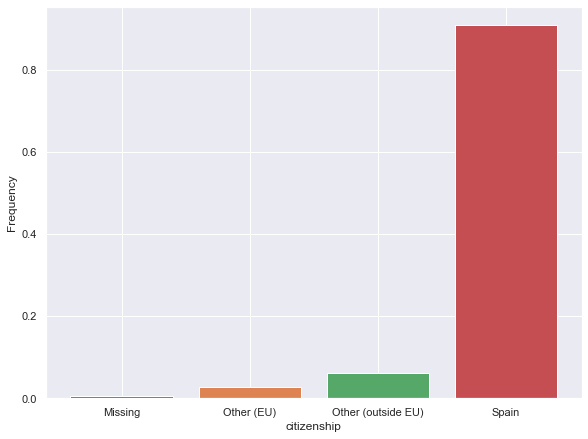

In [36]:
barplot(x='citizenship', data=variables)

In [37]:
#Not every spanish citizen was born in Spain. Naturalized citizens may have their own sociodemographic characteritics. Hence
#is interesting to keep them in a separate group.

variables['country_of_birth'] = silc['Country of birth']

variables.country_of_birth = variables.country_of_birth.fillna('Missing')
variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,country_of_birth
0,101,906.15830,No,Male,70,Married,No,Basque Country,Thinly-populated area,Spain,Spain
1,102,906.15830,No,Female,68,Married,No,Basque Country,Thinly-populated area,Spain,Spain
2,201,1227.68869,No,Female,72,Married,No,Basque Country,Thinly-populated area,Spain,Spain
3,202,1227.68869,No,Male,60,Married,No,Basque Country,Thinly-populated area,Spain,Spain
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country,Thinly-populated area,Spain,Spain


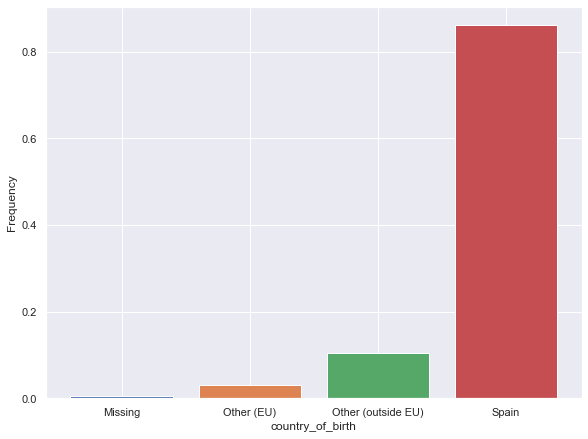

In [38]:
barplot(x='country_of_birth', data=variables)

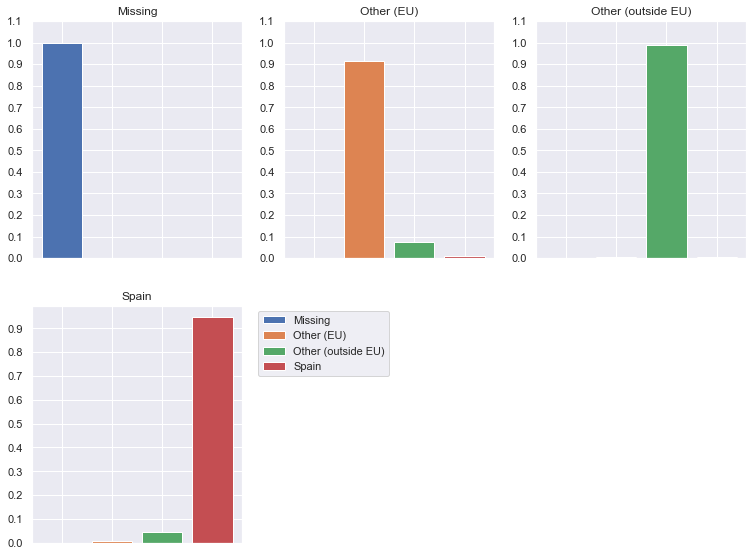

In [39]:
bardiagram(x='citizenship', y='country_of_birth', data=variables, legend=True)

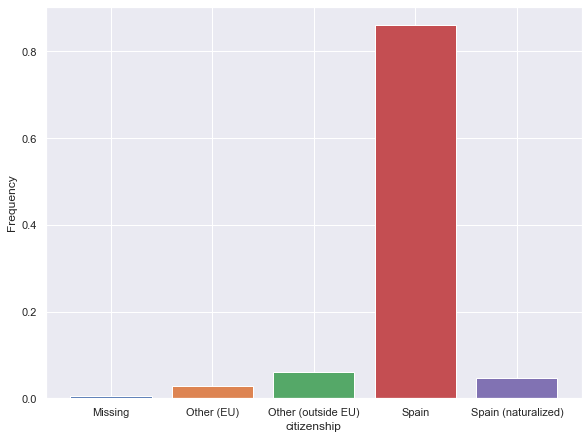

In [40]:
variables['citizenship'] = variables.apply(lambda row: "Spain (naturalized)" 
                                           if row['citizenship'] == 'Spain' 
                                           and row['country_of_birth'] == 'Other (outside EU)'
                                           else ("Spain (naturalized)"
                                                 if row['citizenship'] == 'Spain'
                                                 and row['country_of_birth'] == 'Other (EU)'
                                                 else row['citizenship']),
                                           axis=1)

barplot(x='citizenship', data=variables)

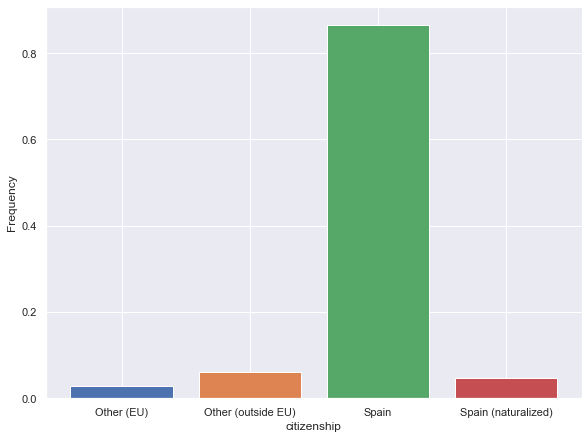

In [41]:
variables['citizenship'] = variables.apply(lambda row: variables.citizenship.mode()[0] 
                                           if row['citizenship'] == 'Missing'
                                           else row['citizenship'],
                                           axis=1)

barplot(x='citizenship', data=variables)

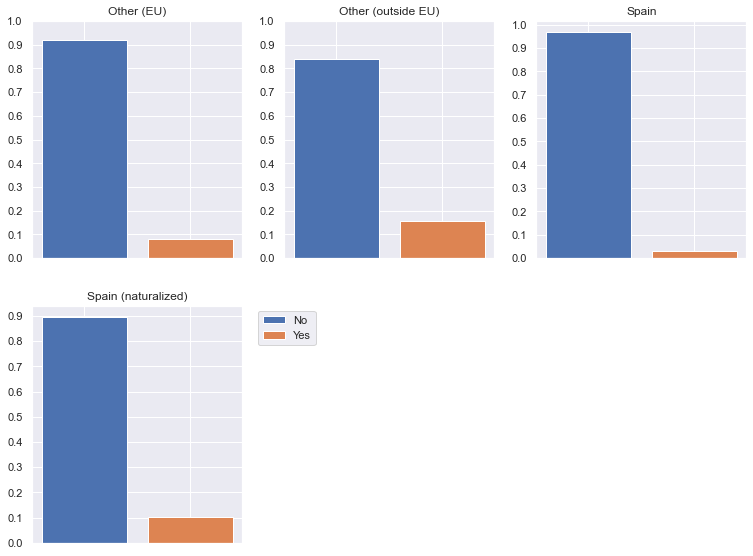

In [42]:
bardiagram(x='citizenship', y='material_deprivation', data=variables, legend=True)

In [43]:
variables = variables.drop(['country_of_birth'], axis=1)

In [44]:
variables['tenure_status'] = silc['Tenure status']

#Replacing the column values with shorter strings
variables.tenure_status = np.where(variables.tenure_status == 'Accommodation is rented at a reduced rate (lower price than the market price)', 'Tenancy at reduced rate', variables.tenure_status)
variables.tenure_status = np.where(variables.tenure_status == 'Tenant or subtenant paying rent at prevailing or market rate', 'Tenancy at market rate', variables.tenure_status)
variables.tenure_status = np.where(variables.tenure_status == 'Accommodation is provided free', 'Free tenancy', variables.tenure_status)

variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,tenure_status
0,101,906.15830,No,Male,70,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner
1,102,906.15830,No,Female,68,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner
2,201,1227.68869,No,Female,72,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner
3,202,1227.68869,No,Male,60,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country,Thinly-populated area,Spain,Outright owner


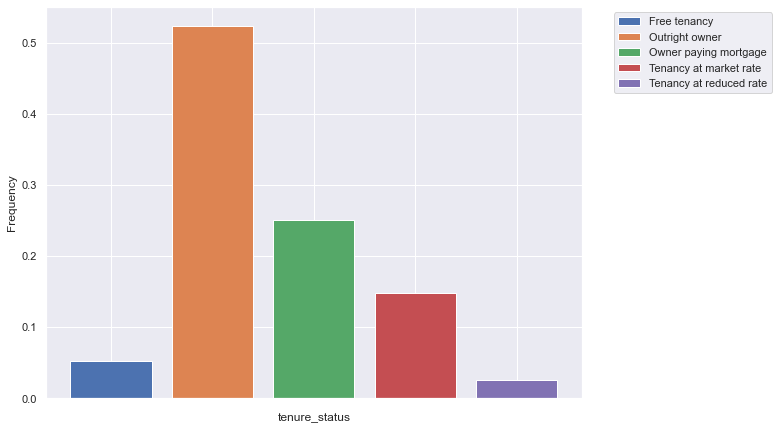

In [45]:
barplot(x='tenure_status', data=variables, legend=True)

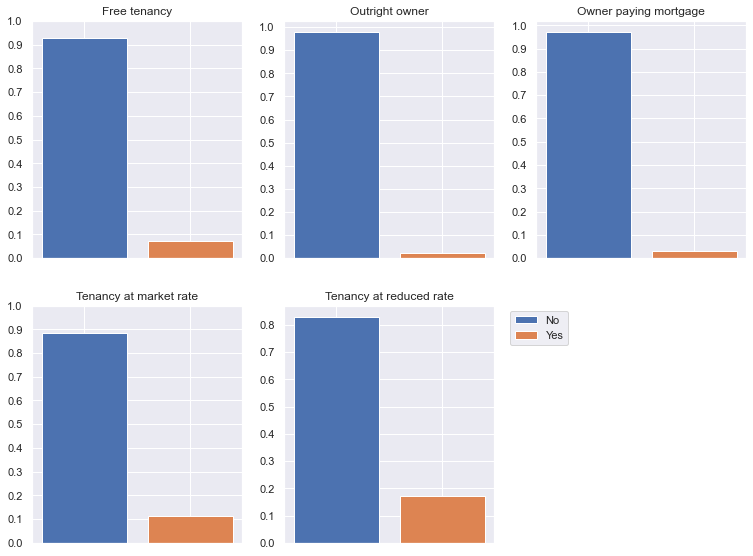

In [46]:
bardiagram(x='tenure_status', y='material_deprivation', data=variables, legend=True)

In [47]:
#Different upper secundary routes are grouped together under the same label

mapped_education_level = {'Higher education': 'Higher education', 
                          'Lower secondary education': 'Lower secondary education', 
                          'Primary education': 'Primary education', 
                          'Early childhood education': 'Pre-primary education', 
                          'Upper secondary education (not further specified)': 'Upper secondary education', 
                          'Upper secondary education (general education)': 'Upper secondary education', 
                          'Upper secondary education (vocational education - with direct access to tertiary education)': 'Upper secondary education',
                          'Upper secondary education (vocational education - without direct access to tertiary education)': 'Upper secondary education', 
                          'Post-secondary non-tertiary education (not further specified)': 'Upper secondary education', 
                          'Post-secondary non-tertiary education (vocational education)': 'Upper secondary education'}

variables['education_level'] = silc['Highest ISCED level attained'].map(mapped_education_level)

variables.education_level = variables.education_level.fillna('Missing')

variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,tenure_status,education_level
0,101,906.15830,No,Male,70,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education
1,102,906.15830,No,Female,68,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education
2,201,1227.68869,No,Female,72,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Lower secondary education
3,202,1227.68869,No,Male,60,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country,Thinly-populated area,Spain,Outright owner,Higher education


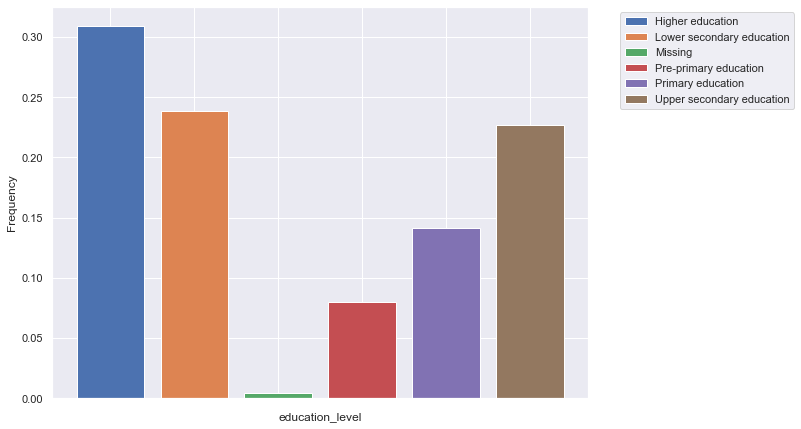

In [48]:
barplot(x='education_level', data=variables, legend=True)

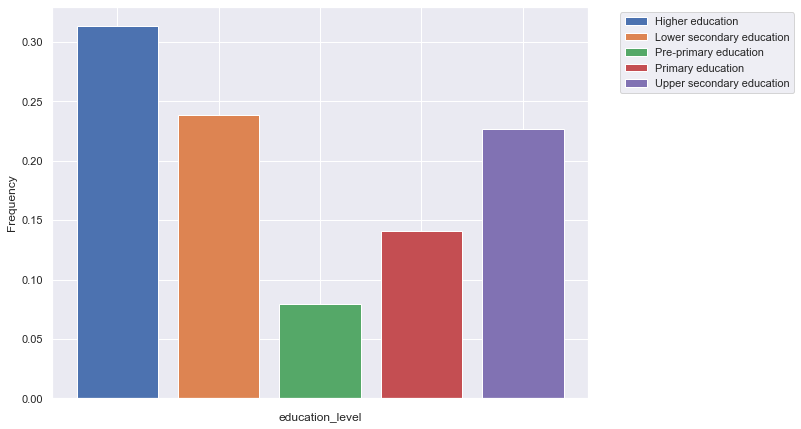

In [49]:
variables['education_level'] = variables.apply(lambda row: variables.education_level.mode()[0] 
                                               if row['education_level'] == 'Missing'
                                               else row['education_level'],
                                               axis=1)

barplot(x='education_level', data=variables, legend=True)

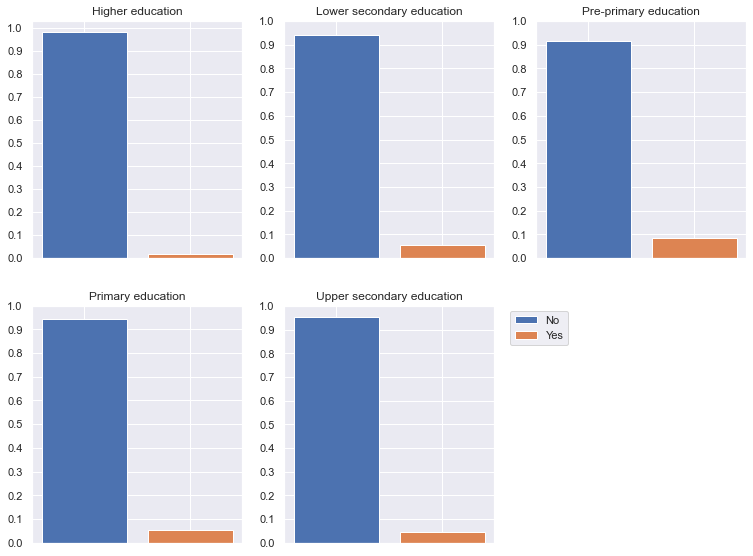

In [50]:
bardiagram(x='education_level', y='material_deprivation', data=variables, legend=True)

In [51]:
variables['working_status'] = silc['Basic activity status']

mapped_working_status = {'In retirement or early retirement or has given up business': 'Retired',
                         'Other inactive person': 'Other',
                         'Unemployed' : 'Unemployed',
                         'At work': 'Employed'}

variables.working_status = variables.working_status.map(mapped_working_status)

variables.working_status = variables.working_status.fillna('Missing')

variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,tenure_status,education_level,working_status
0,101,906.15830,No,Male,70,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired
1,102,906.15830,No,Female,68,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Other
2,201,1227.68869,No,Female,72,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Lower secondary education,Other
3,202,1227.68869,No,Male,60,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country,Thinly-populated area,Spain,Outright owner,Higher education,Other


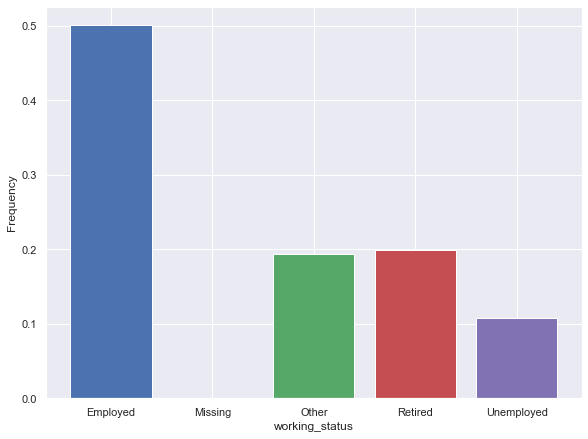

In [52]:
barplot(x='working_status', data=variables)

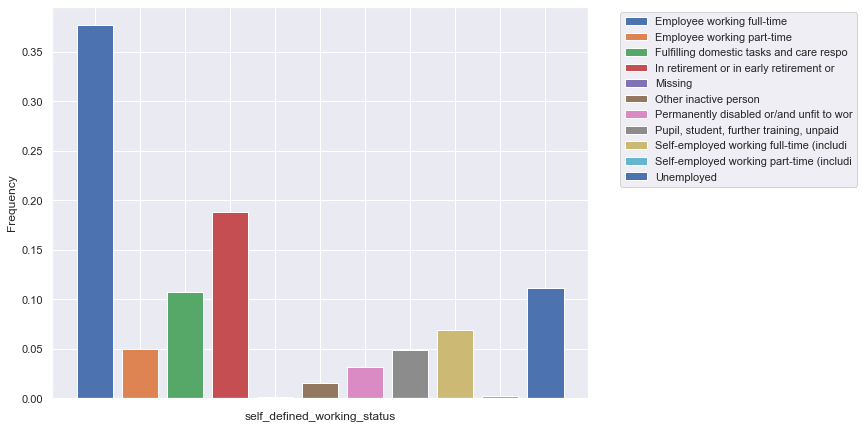

In [53]:
#The self defined working status column gives more detail into the particular working situation of each respondent.

variables['self_defined_working_status'] = silc['Self-defined current economic status']

variables.self_defined_working_status = variables.self_defined_working_status.fillna('Missing')

barplot(x='self_defined_working_status', data=variables, legend=True)

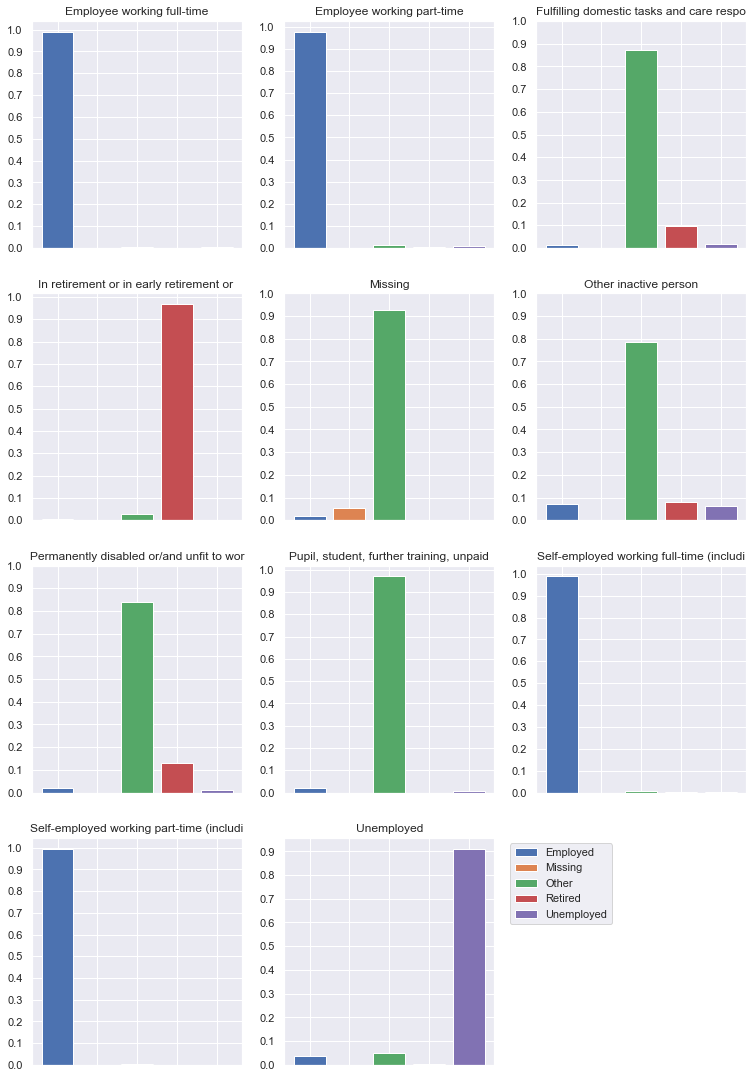

In [54]:
#The 'Other' label seems to be made of domestic workers, students and disable individuals, all distinct groups on their own.

bardiagram(x='self_defined_working_status', y='working_status', data=variables, legend=True)

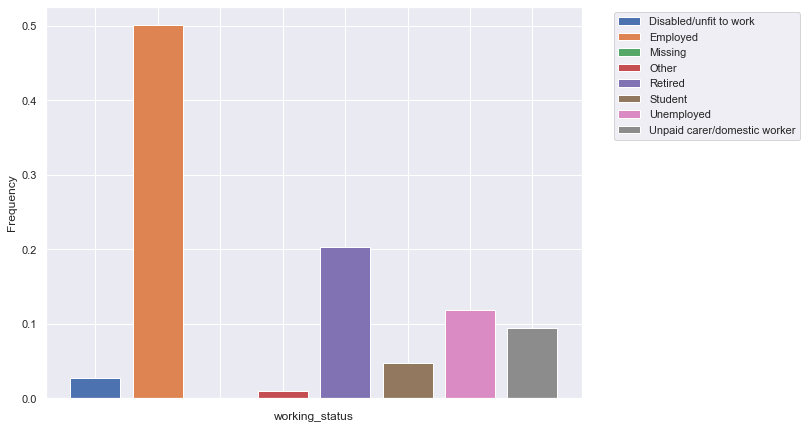

In [55]:
variables.working_status = variables.apply(lambda row: "Unpaid carer/domestic worker" 
                                                 if row['working_status'] == 'Other' 
                                                 and row['self_defined_working_status'] == 
                                                 'Fulfilling domestic tasks and care responsibilities'
                                                 else ("Disabled/unfit to work"
                                                    if row['working_status'] == 'Other'
                                                    and row['self_defined_working_status'] == 
                                                       'Permanently disabled or/and unfit to work'
                                                       else ('Student'
                                                          if row['working_status'] == 'Other'
                                                          and row['self_defined_working_status'] == 
                                                             'Pupil, student, further training, unpaid work experience'
                                                             else ('Unemployed'
                                                                if row['working_status'] == 'Other'
                                                                and row['self_defined_working_status'] == 
                                                                   'Other inactive person'
                                                                   else ('Retired'
                                                                      if row['working_status'] == 'Other'
                                                                      and row['self_defined_working_status'] == 
                                                                      'In retirement or in early retirement or has given up business'
                                                                      else ('Employed'
                                                                            if row['working_status'] == 'Employed'
                                                                            and row['self_defined_working_status'] ==
                                                                            'Self-employed working full-time (including family worker)'
                                                                            else ('Employed'
                                                                                  if row['working_status'] == 'Employed'
                                                                                  and row['self_defined_working_status'] ==
                                                                                  'Self-employed working part-time (including family worker)'
                                                                                  else row['working_status'])))))),
                                                 axis=1)

barplot(x='working_status', data=variables, legend=True)

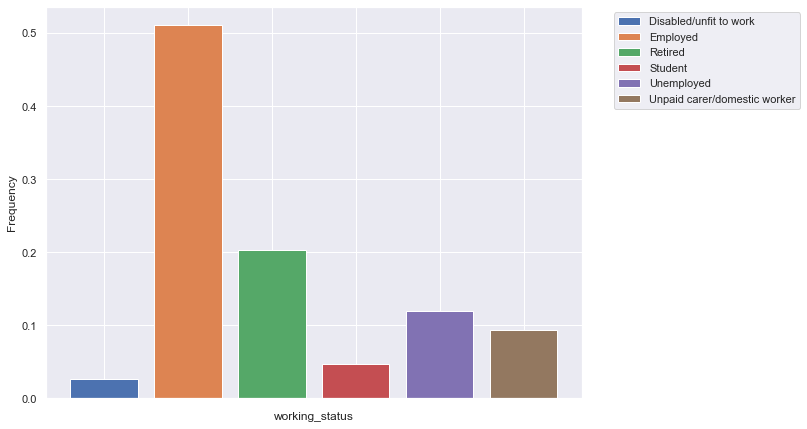

In [56]:
variables.working_status = variables.apply(lambda row: variables.working_status.mode()[0]  
                                              if row['working_status'] == 'Missing'
                                              else row['working_status'],
                                              axis=1)

variables.working_status = variables.apply(lambda row: variables.working_status.mode()[0]  
                                              if row['working_status'] == 'Other'
                                              else row['working_status'],
                                              axis=1)

barplot(x='working_status', data=variables, legend=True)

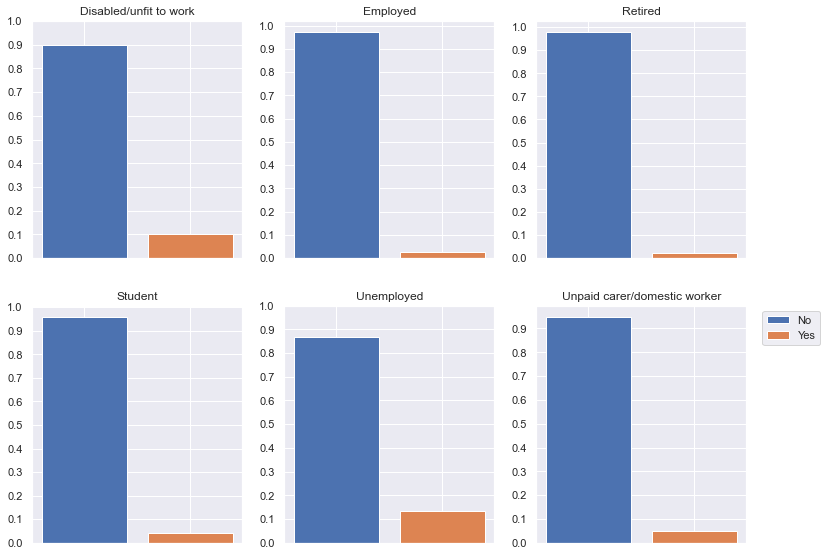

In [57]:
bardiagram(x='working_status', y='material_deprivation', data=variables, legend=True)

In [58]:
variables = variables.drop(['self_defined_working_status'], axis=1)

In [59]:
#The SILC uses the International Standard Classification of Occupations (ISCO-08) to label each of the respondans jobs if
#any. Here each label gets grouped in their major ISCO-08 groups.

variables['occupation'] = silc['Occupation']

mapped_occupation = {'Managers': 'Managers', 
                     'Chief Executives, Senior Officials and Legislators': 'Managers', 
                     'Administrative and Commercial Managers': 'Managers', 
                     'Production and Specialized Services Managers': 'Managers', 
                     'Hospitality, Retail and Other Services Managers': 'Managers', 
                     'Professionals': 'Professionals', 
                     'Science and Engineering Professionals': 'Professionals', 
                     'Health Professionals': 'Professionals', 
                     'Teaching Professionals': 'Professionals', 
                     'Business and Administration Professionals': 'Professionals', 
                     'Information and Communications Technology Professionals': 'Professionals', 
                     'Legal, Social and Cultural Professionals': 'Professionals', 
                     'Technicians and Associate Professionals': 'Technicians and Associate Professionals', 
                     'Science and Engineering Associate Professionals': 'Technicians and Associate Professionals', 
                     'Health Associate Professionals': 'Technicians and Associate Professionals', 
                     'Business and Administration Associate Professionals': 'Technicians and Associate Professionals', 
                     'Legal, Social, Cultural and Related Associate Professionals': 'Technicians and Associate Professionals', 
                     'Information and Communications Technicians': 'Technicians and Associate Professionals', 
                     'Clerical Support Workers': 'Clerical Support Workers', 
                     'General and Keyboard Clerks': 'Clerical Support Workers', 
                     'Customer Services Clerks': 'Clerical Support Workers', 
                     'Numerical and Material Recording Clerks': 'Clerical Support Workers', 
                     'Other Clerical Support Workers': 'Clerical Support Workers', 
                     'Services and Sales Workers': 'Services and Sales Workers', 
                     'Personal Services Workers': 'Services and Sales Workers', 
                     'Sales Workers': 'Services and Sales Workers', 
                     'Personal Care Workers': 'Services and Sales Workers', 
                     'Protective Services Workers': 'Services and Sales Workers', 
                     'Skilled Agricultural, Forestry and Fishery Workers': 'Skilled Agricultural, Forestry and Fishery Workers', 
                     'Market-oriented Skilled Agricultural Workers': 'Skilled Agricultural, Forestry and Fishery Workers', 
                     'Market-oriented Skilled Forestry, Fishery and Hunting Workers': 'Skilled Agricultural, Forestry and Fishery Workers', 
                     'Subsistence Farmers, Fishers, Hunters and Gatherers': 'Skilled Agricultural, Forestry and Fishery Workers', 
                     'Craft and Related Trades Workers': 'Craft and Related Trades Workers', 
                     'Building and Related Trades Workers (excluding Electricians)': 'Craft and Related Trades Workers', 
                     'Metal, Machinery and Related Trades Workers': 'Craft and Related Trades Workers', 
                     'Handicraft and Printing Workers': 'Craft and Related Trades Workers', 
                     'Electrical and Electronic Trades Workers': 'Craft and Related Trades Workers', 
                     'Food Processing, Woodworking, Garment and Other Craft and Related Trades Workers': 'Craft and Related Trades Workers', 
                     'Plant and Machine Operators and Assemblers': 'Plant and Machine Operators and Assemblers', 
                     'Stationary Plant and Machine Operators': 'Plant and Machine Operators and Assemblers', 
                     'Assemblers': 'Plant and Machine Operators and Assemblers', 
                     'Drivers and Mobile Plant Operators': 'Plant and Machine Operators and Assemblers', 
                     'Elementary Occupations': 'Elementary Occupations', 
                     'Cleaners and Helpers': 'Elementary Occupations', 
                     'Agricultural, Forestry and Fishery Labourers': 'Elementary Occupations', 
                     'Labourers in Mining, Construction, Manufacturing and Transport': 'Elementary Occupations', 
                     'Food Preparation Assistants': 'Food Preparation Assistants', 
                     'Street and Related Sales and Services Workers': 'Street and Related Sales and Services Workers', 
                     'Refuse Workers and Other Elementary Workers': 'Elementary Occupations'}

variables.occupation = variables.occupation.map(mapped_occupation)

variables.occupation = variables.occupation.fillna('Missing')

variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,tenure_status,education_level,working_status,occupation
0,101,906.15830,No,Male,70,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Clerical Support Workers
1,102,906.15830,No,Female,68,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Unpaid carer/domestic worker,Clerical Support Workers
2,201,1227.68869,No,Female,72,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Lower secondary education,Unpaid carer/domestic worker,Elementary Occupations
3,202,1227.68869,No,Male,60,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Services and Sales Workers
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country,Thinly-populated area,Spain,Outright owner,Higher education,Disabled/unfit to work,Services and Sales Workers


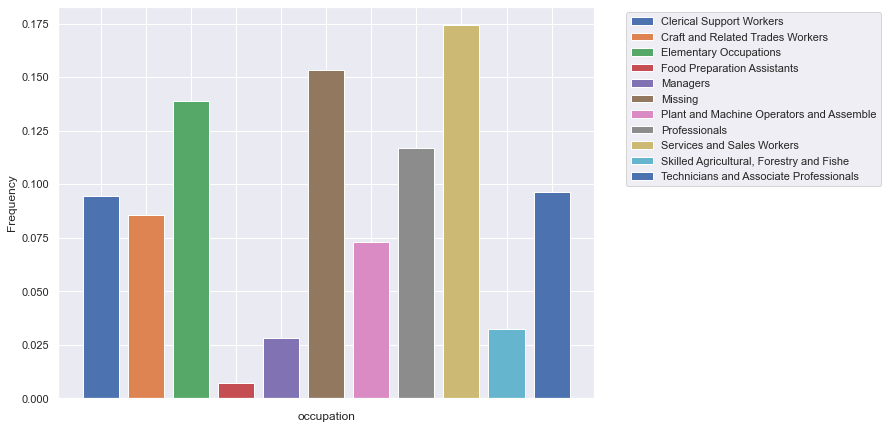

In [60]:
#The high number of missing values takes place most likely for one of the following reasons. Either because some occupations 
#might be too vague to fall neatly into one specific category, because that person has never worked or because that person
#might be in a transition period and he/she is not working at the present moment.

barplot(x='occupation', data=variables, legend=True)

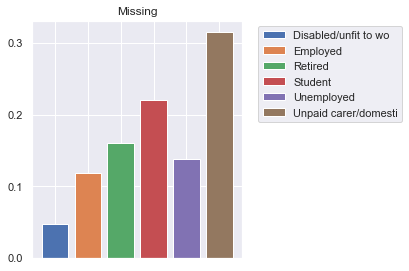

In [61]:
bardiagram(x='occupation', y='working_status', data=variables[variables.occupation == 'Missing'], legend=True)

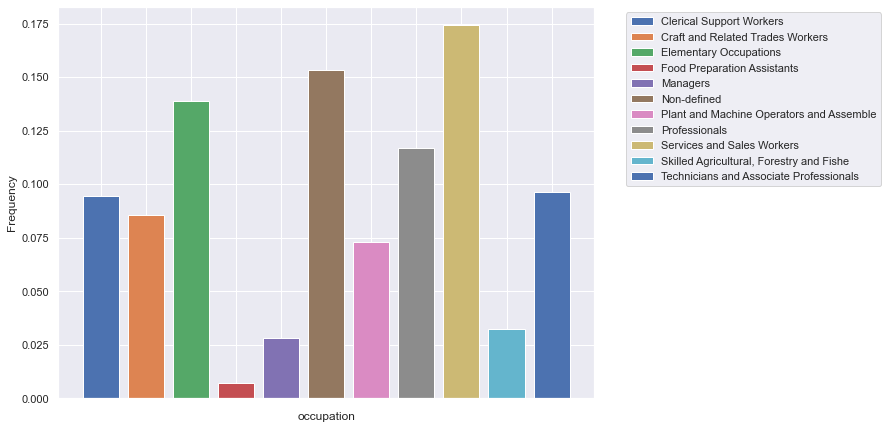

In [62]:
#All missing occupation values get grouped under the label 'Non-defined'

variables.occupation = variables.apply(lambda row: 'Non-defined'  
                                       if row['occupation'] == 'Missing'
                                       else row['occupation'],
                                       axis=1)

barplot(x='occupation', data=variables, legend=True)

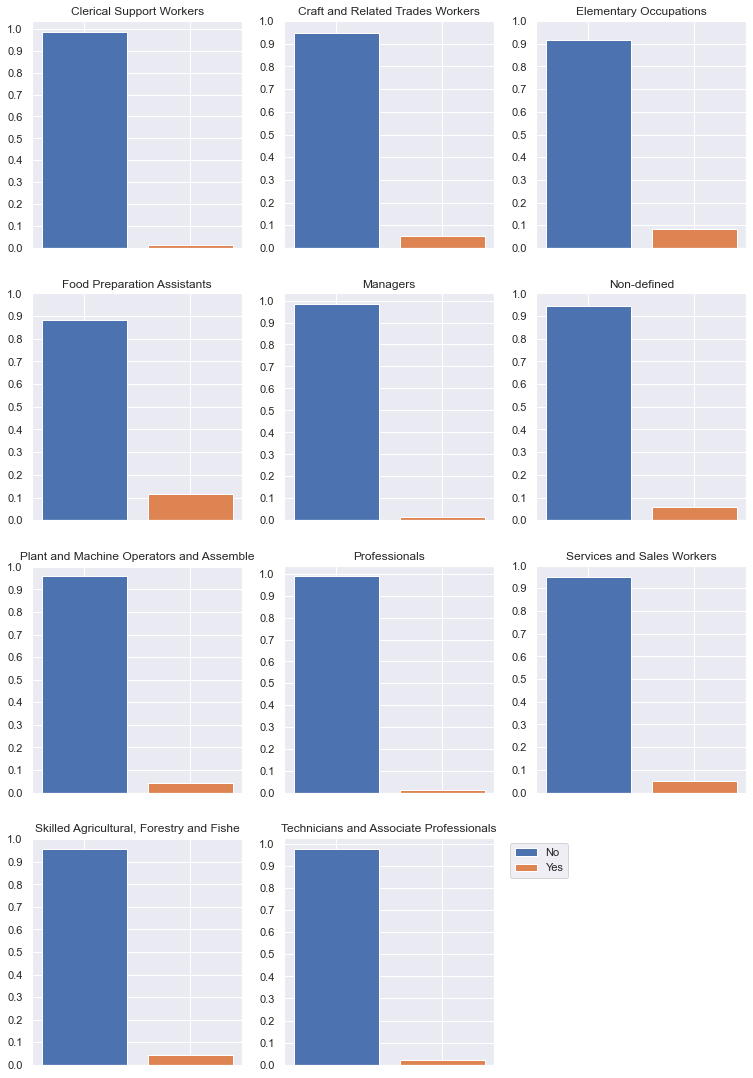

In [63]:
bardiagram(x='occupation', y='material_deprivation', data=variables, legend=True)

In [64]:
variables['years_worked'] = silc['Number of years spent in paid work']

variables.years_worked = variables.years_worked.fillna(0)

variables.years_worked = [int(value) if value != ' ' else 0 for value in variables.years_worked] #Peoplo who have never worked get a value of 0

variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,tenure_status,education_level,working_status,occupation,years_worked
0,101,906.15830,No,Male,70,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Clerical Support Workers,47
1,102,906.15830,No,Female,68,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Unpaid carer/domestic worker,Clerical Support Workers,2
2,201,1227.68869,No,Female,72,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Lower secondary education,Unpaid carer/domestic worker,Elementary Occupations,20
3,202,1227.68869,No,Male,60,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Services and Sales Workers,35
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country,Thinly-populated area,Spain,Outright owner,Higher education,Disabled/unfit to work,Services and Sales Workers,30


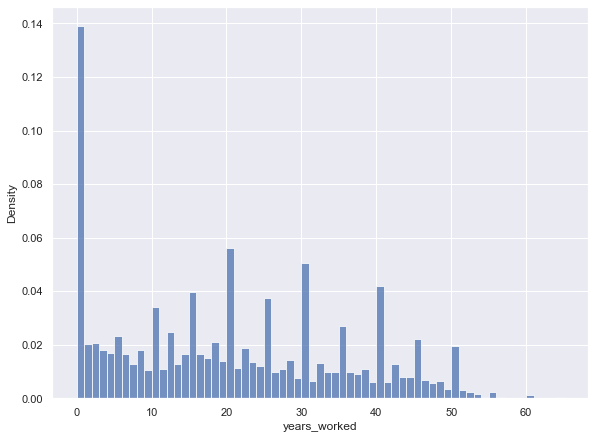

In [65]:
histplot(x='years_worked', data=variables, bins=max(variables.years_worked))

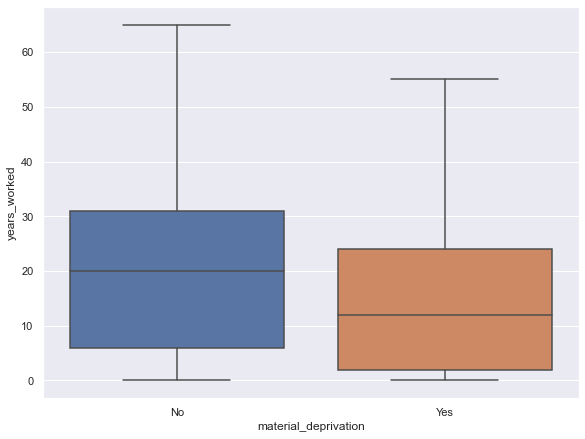

In [66]:
boxplot(x='material_deprivation', y='years_worked', data=variables)

In [67]:
#This variable is the total sum of the number of hours worked a week in every job.

variables['hours_week_worked'] = silc['Number of hours usually worked per week in main job'] + silc['Total number of hours usually worked in second, third, … jobs']
    
variables.hours_week_worked = variables.hours_week_worked.fillna(0)

variables.hours_week_worked = [int(value) if value != '  ' else 0 for value in variables.hours_week_worked]

variables.hours_week_worked = [int(str(value)[:2]) for value in variables.hours_week_worked]

variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,tenure_status,education_level,working_status,occupation,years_worked,hours_week_worked
0,101,906.15830,No,Male,70,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Clerical Support Workers,47,0
1,102,906.15830,No,Female,68,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Unpaid carer/domestic worker,Clerical Support Workers,2,0
2,201,1227.68869,No,Female,72,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Lower secondary education,Unpaid carer/domestic worker,Elementary Occupations,20,0
3,202,1227.68869,No,Male,60,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Services and Sales Workers,35,0
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country,Thinly-populated area,Spain,Outright owner,Higher education,Disabled/unfit to work,Services and Sales Workers,30,0


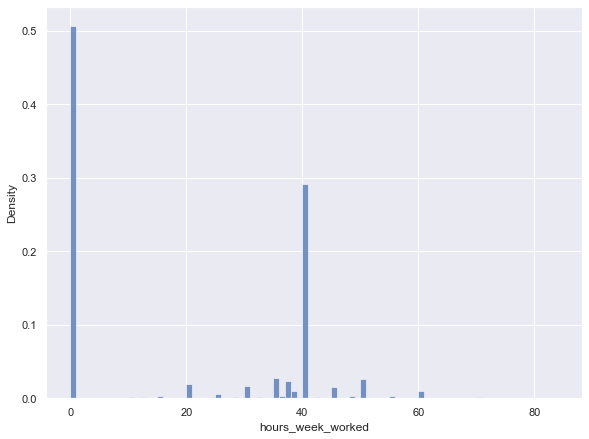

In [68]:
histplot(x='hours_week_worked', data=variables, bins=max(variables.hours_week_worked))

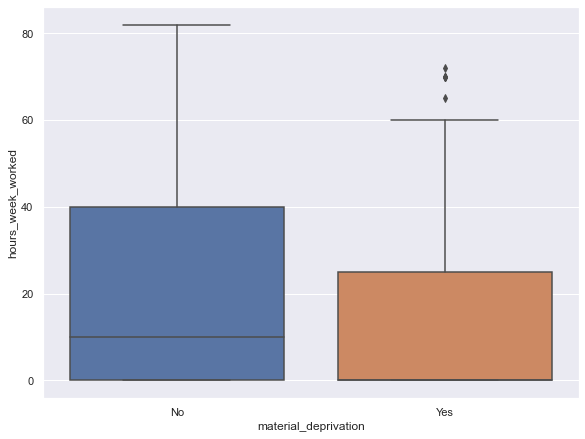

In [69]:
boxplot(x='material_deprivation', y='hours_week_worked', data=variables)

In [70]:
#The adjusted income is the household annual income divided by its consumption unit. This adjustment improves the information
#provided by the income since any given income ammounts to less in big household than in a small one.

variables['adjusted_income'] = silc['Total disposable household income including imputed rent'] / silc['Consumption unit']

variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,tenure_status,education_level,working_status,occupation,years_worked,hours_week_worked,adjusted_income
0,101,906.15830,No,Male,70,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Clerical Support Workers,47,0,24418.740
1,102,906.15830,No,Female,68,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Unpaid carer/domestic worker,Clerical Support Workers,2,0,24418.740
2,201,1227.68869,No,Female,72,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Lower secondary education,Unpaid carer/domestic worker,Elementary Occupations,20,0,31261.480
3,202,1227.68869,No,Male,60,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Services and Sales Workers,35,0,31261.480
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country,Thinly-populated area,Spain,Outright owner,Higher education,Disabled/unfit to work,Services and Sales Workers,30,0,6007.805


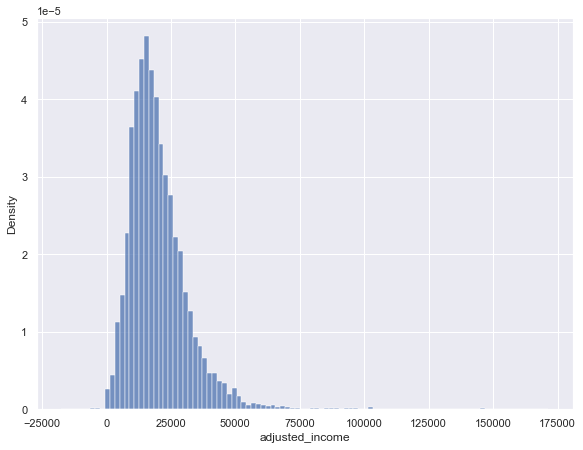

In [71]:
histplot(x='adjusted_income', data=variables, bins=100)

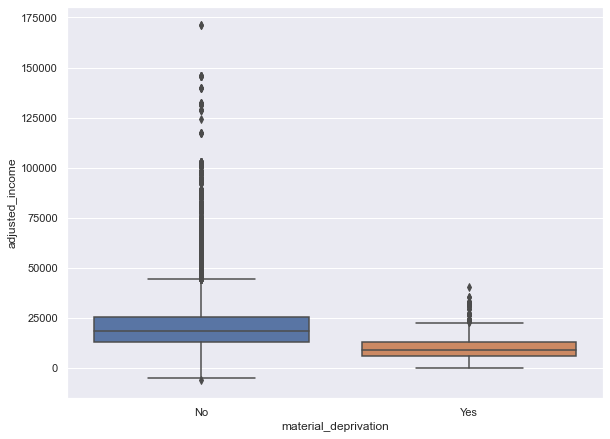

In [72]:
boxplot(x='material_deprivation', y='adjusted_income', data=variables)

In [73]:
#The proportion of social welfare is computed by dividing the annual social welfare received by a household by its total 
#annual income.

variables['proportion_social_welfare'] = (silc['Total disposable household income'] - silc['Total disposable household income before social transfers other than old-age and survivor’s benefits']) / silc['Total disposable household income']

In [74]:
variables.proportion_social_welfare.isna().sum()

96

In [75]:
#Missing values are replaces by the median

variables.proportion_social_welfare = variables.proportion_social_welfare.fillna(variables.proportion_social_welfare.median())

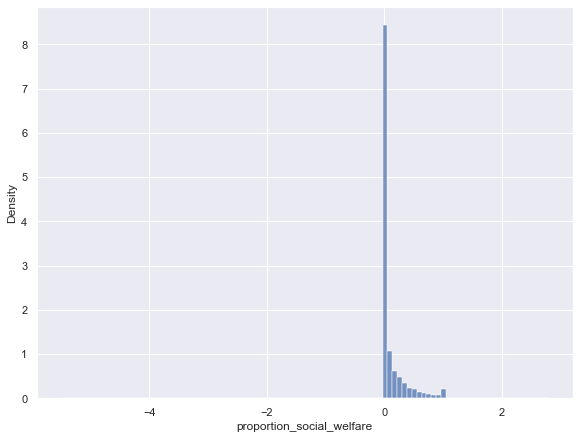

In [76]:
#Some outliers over extend the range of the column. 

histplot(x='proportion_social_welfare', data=variables, bins=100)

In [77]:
variables.proportion_social_welfare = variables.apply(lambda row: 0.0  
                                      if row['proportion_social_welfare'] < 0.0
                                      else row['proportion_social_welfare'],
                                      axis=1)

variables.proportion_social_welfare = variables.apply(lambda row: 1.0  
                                      if row['proportion_social_welfare'] > 1.0
                                      else row['proportion_social_welfare'],
                                      axis=1)

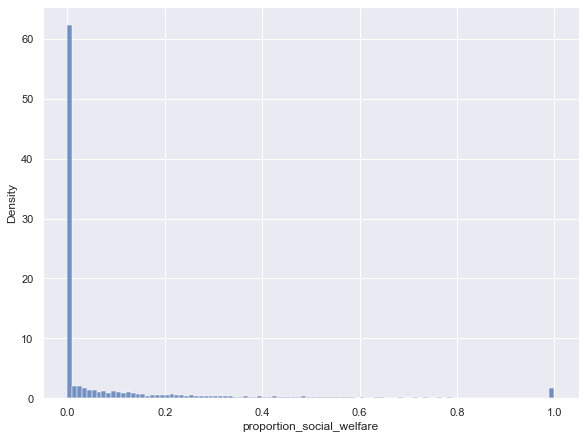

In [78]:
histplot(x='proportion_social_welfare', data=variables, bins=100)

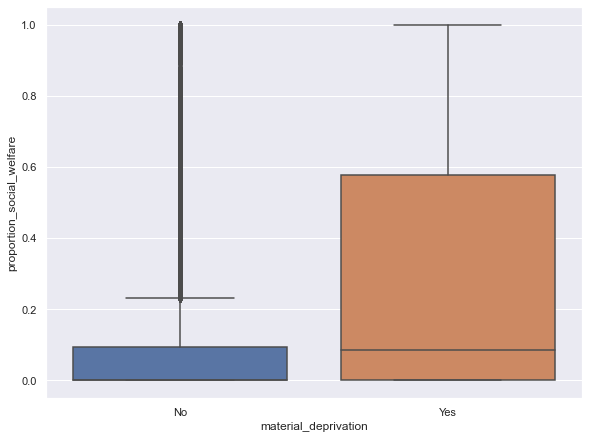

In [79]:
boxplot(x='material_deprivation', y='proportion_social_welfare', data=variables)

In [80]:
#The following four columns are subjective questions about the respondents state of health. They will be computed into yes or
#no variables.

variables['self_perceived_bad_health'] = silc['General health'].map({'Very good': 'No', 
                                                                     'Good': 'No', 
                                                                     'Fair': 'No', 
                                                                     'Bad': 'Yes', 
                                                                     'Very bad': 'Yes'})

variables.self_perceived_bad_health = variables.self_perceived_bad_health.fillna('Missing')

variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,tenure_status,education_level,working_status,occupation,years_worked,hours_week_worked,adjusted_income,proportion_social_welfare,self_perceived_bad_health
0,101,906.15830,No,Male,70,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Clerical Support Workers,47,0,24418.740,0.0,Yes
1,102,906.15830,No,Female,68,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Unpaid carer/domestic worker,Clerical Support Workers,2,0,24418.740,0.0,No
2,201,1227.68869,No,Female,72,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Lower secondary education,Unpaid carer/domestic worker,Elementary Occupations,20,0,31261.480,0.0,No
3,202,1227.68869,No,Male,60,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Services and Sales Workers,35,0,31261.480,0.0,No
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country,Thinly-populated area,Spain,Outright owner,Higher education,Disabled/unfit to work,Services and Sales Workers,30,0,6007.805,0.0,No


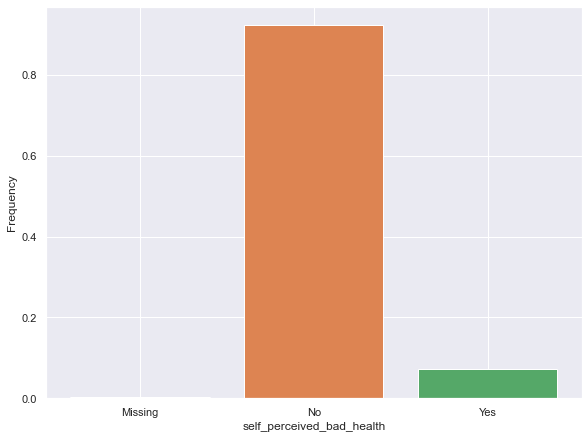

In [81]:
barplot(x='self_perceived_bad_health', data=variables)

In [82]:
variables['has_health_limitations'] = silc['Limitation in activities because of health problems'].map({'Yes, limited': 'Yes',
                                                                                                       'Yes, strongly limited': 'Yes', 
                                                                                                       'No, not limited': 'No'})

variables.has_health_limitations = variables.has_health_limitations.fillna('Missing')

variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,tenure_status,education_level,working_status,occupation,years_worked,hours_week_worked,adjusted_income,proportion_social_welfare,self_perceived_bad_health,has_health_limitations
0,101,906.15830,No,Male,70,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Clerical Support Workers,47,0,24418.740,0.0,Yes,Yes
1,102,906.15830,No,Female,68,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Unpaid carer/domestic worker,Clerical Support Workers,2,0,24418.740,0.0,No,No
2,201,1227.68869,No,Female,72,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Lower secondary education,Unpaid carer/domestic worker,Elementary Occupations,20,0,31261.480,0.0,No,No
3,202,1227.68869,No,Male,60,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Services and Sales Workers,35,0,31261.480,0.0,No,No
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country,Thinly-populated area,Spain,Outright owner,Higher education,Disabled/unfit to work,Services and Sales Workers,30,0,6007.805,0.0,No,Yes


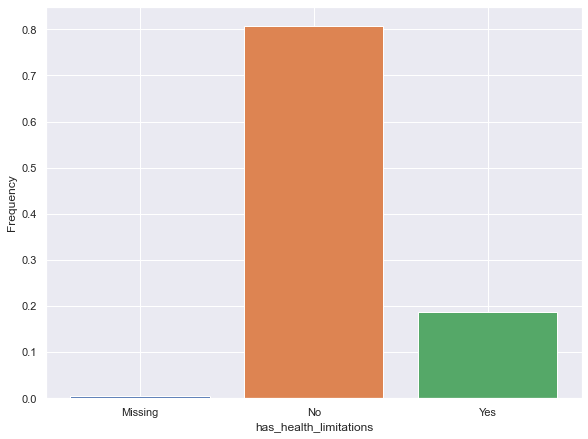

In [83]:
barplot(x='has_health_limitations', data=variables)

In [84]:
variables['has_chronic_condition'] = silc['Suffer from any chronic (long-standing) illness or condition'].fillna('Missing')

variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,...,education_level,working_status,occupation,years_worked,hours_week_worked,adjusted_income,proportion_social_welfare,self_perceived_bad_health,has_health_limitations,has_chronic_condition
0,101,906.15830,No,Male,70,Married,No,Basque Country,Thinly-populated area,Spain,...,Upper secondary education,Retired,Clerical Support Workers,47,0,24418.740,0.0,Yes,Yes,Yes
1,102,906.15830,No,Female,68,Married,No,Basque Country,Thinly-populated area,Spain,...,Upper secondary education,Unpaid carer/domestic worker,Clerical Support Workers,2,0,24418.740,0.0,No,No,Yes
2,201,1227.68869,No,Female,72,Married,No,Basque Country,Thinly-populated area,Spain,...,Lower secondary education,Unpaid carer/domestic worker,Elementary Occupations,20,0,31261.480,0.0,No,No,No
3,202,1227.68869,No,Male,60,Married,No,Basque Country,Thinly-populated area,Spain,...,Upper secondary education,Retired,Services and Sales Workers,35,0,31261.480,0.0,No,No,No
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country,Thinly-populated area,Spain,...,Higher education,Disabled/unfit to work,Services and Sales Workers,30,0,6007.805,0.0,No,Yes,Yes


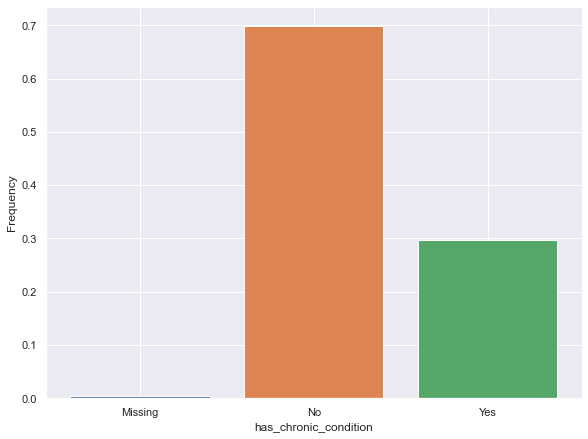

In [85]:
barplot(x='has_chronic_condition', data=variables)

In [86]:
variables['unmet_medical_treatment'] = silc['Unmet need for medical examination or treatment'].fillna('Missing').map({'Missing': 'No', 
                                                                                                                 'No, there was no occasion when the person really needed examination or treatment but did not receive it': 'No', 
                                                                                                                 'Yes, there was at least one occasion when the person really needed examination or treatment but did not receive it': 'Yes'})

variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,...,working_status,occupation,years_worked,hours_week_worked,adjusted_income,proportion_social_welfare,self_perceived_bad_health,has_health_limitations,has_chronic_condition,unmet_medical_treatment
0,101,906.15830,No,Male,70,Married,No,Basque Country,Thinly-populated area,Spain,...,Retired,Clerical Support Workers,47,0,24418.740,0.0,Yes,Yes,Yes,No
1,102,906.15830,No,Female,68,Married,No,Basque Country,Thinly-populated area,Spain,...,Unpaid carer/domestic worker,Clerical Support Workers,2,0,24418.740,0.0,No,No,Yes,No
2,201,1227.68869,No,Female,72,Married,No,Basque Country,Thinly-populated area,Spain,...,Unpaid carer/domestic worker,Elementary Occupations,20,0,31261.480,0.0,No,No,No,No
3,202,1227.68869,No,Male,60,Married,No,Basque Country,Thinly-populated area,Spain,...,Retired,Services and Sales Workers,35,0,31261.480,0.0,No,No,No,No
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country,Thinly-populated area,Spain,...,Disabled/unfit to work,Services and Sales Workers,30,0,6007.805,0.0,No,Yes,Yes,No


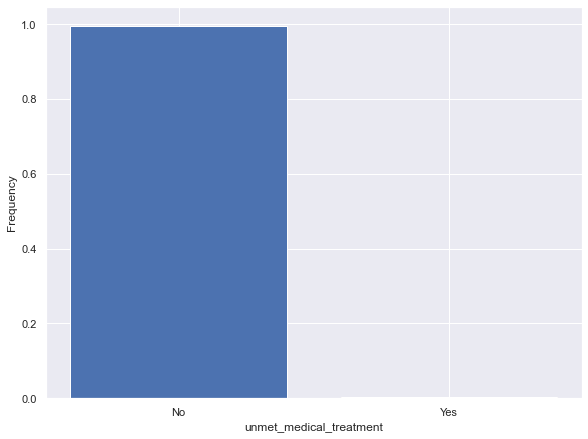

In [87]:
barplot(x='unmet_medical_treatment', data=variables)

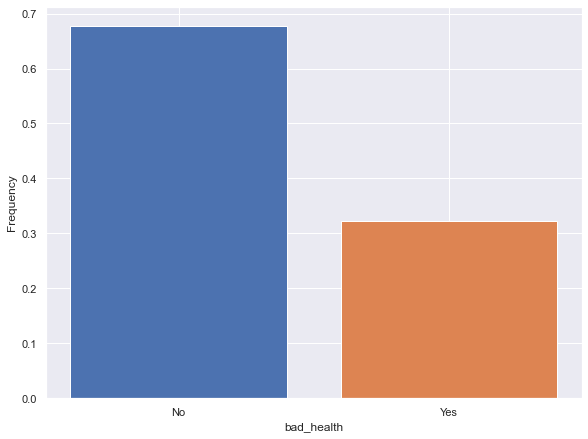

In [88]:
#Bad health discerns between anyone who answers yes to any of the four previous questions and the rest.

variables['bad_health'] = variables.apply(lambda row: 'Yes'
                                          if row['self_perceived_bad_health'] == 'Yes'
                                          else('Yes' 
                                               if row['has_health_limitations'] == 'Yes'
                                               else('Yes'
                                                   if row['has_chronic_condition'] == 'Yes'
                                                   else('Yes'
                                                        if row['unmet_medical_treatment'] == 'Yes'
                                                            else 'No'))),
                                          axis=1)

barplot(x='bad_health', data=variables)

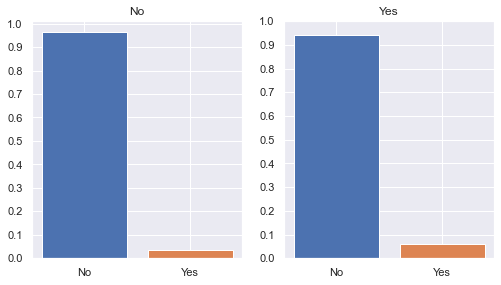

In [93]:
bardiagram(x='bad_health', y='material_deprivation', data=variables)

In [89]:
variables = variables.drop(['self_perceived_bad_health', 'has_health_limitations', 'has_chronic_condition', 'unmet_medical_treatment'], axis=1)

In [90]:
variables.head()

,id,weight,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,tenure_status,education_level,working_status,occupation,years_worked,hours_week_worked,adjusted_income,proportion_social_welfare,bad_health
0,101,906.15830,No,Male,70,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Clerical Support Workers,47,0,24418.740,0.0,Yes
1,102,906.15830,No,Female,68,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Unpaid carer/domestic worker,Clerical Support Workers,2,0,24418.740,0.0,Yes
2,201,1227.68869,No,Female,72,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Lower secondary education,Unpaid carer/domestic worker,Elementary Occupations,20,0,31261.480,0.0,No
3,202,1227.68869,No,Male,60,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Services and Sales Workers,35,0,31261.480,0.0,No
4,301,2559.35987,No,Female,54,Divorced,Yes,Basque Country,Thinly-populated area,Spain,Outright owner,Higher education,Disabled/unfit to work,Services and Sales Workers,30,0,6007.805,0.0,Yes


In [403]:
variables.to_csv('variables.csv', index=False)

In [91]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32514 entries, 0 to 32513
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         32514 non-null  int64  
 1   weight                     32514 non-null  float64
 2   material_deprivation       32514 non-null  object 
 3   sex                        32514 non-null  object 
 4   age                        32514 non-null  int64  
 5   civil_status               32514 non-null  object 
 6   familial_status            32514 non-null  object 
 7   region                     32514 non-null  object 
 8   population_density         32514 non-null  object 
 9   citizenship                32514 non-null  object 
 10  tenure_status              32514 non-null  object 
 11  education_level            32514 non-null  object 
 12  working_status             32514 non-null  object 
 13  occupation                 32514 non-null  obj

In [92]:
#Printing all columns in the survey for easy access

for c in silc.columns:
    print(c)

Personal ID
Personal cross-sectional weight
Year of birth
Sex
Basic activity status
Education at pre-school
Education at compulsory school
Childcare at centre-based services
Childcare at day-care centre
Childcare by a professional child-minder at child's home or at child-minder’s home
Childcare by grand-parents, other household members (outside parents), other relatives, friends or neighbours
Childrens’ cross-sectional weight for childcare
Living in household with low employement level
Living in household under risk of poverty
Marital status
Consensual Union
Country of birth
Citizenship
Current education activity
ISCED level currently attended
Year when highest level of education was attained
Highest ISCED level attained
Self-defined current economic status
Whether person has ever worked
Actively looking for a job
Available for work
Status in employment
Occupation
Number of hours usually worked per week in main job
Number of months spent at full-time work as employee
Number of months s